In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.insert(0, '/home/aew492/research-summer2020/code')
import globals
globals.initialize_vals()
cat_tag = globals.cat_tag
data_dir = globals.data_dir
grad_dir = globals.grad_dir

In [2]:
suave_dir = os.path.join(grad_dir, 'suave_data')
nmocks = 401

In [3]:
# load in suave dicts
def load_suave_dict(rlz, m=1, cosmo=False):
    basis_type = 'bao_fixed' if cosmo else 'bao_iterative'
    suave_dict = np.load(os.path.join(suave_dir, f'{cat_tag}/{basis_type}/cat_{cat_tag}_lognormal_rlz{rlz}_m-{m}.000-L_b-0.500.npy'), allow_pickle=True).item()
    return suave_dict

In [4]:
# bao_iterative
grads_rec_it = np.empty((nmocks, 3))
for i in range(nmocks):
    suave_dict = load_suave_dict(i)
    grads_rec_it[i] = suave_dict['grad_recovered']

avg_grad_rec_it = np.mean(grads_rec_it, axis=0)
print(avg_grad_rec_it)

[ 2.76594786e-03 -1.60945306e-04 -2.81149669e-05]


In [5]:
# bao_fixed
grads_rec_fix = np.empty((nmocks, 3))
for i in range(nmocks):
    suave_dict = load_suave_dict(i, cosmo=True)
    grads_rec_fix[i] = suave_dict['grad_recovered']

avg_grad_rec_fix = np.mean(grads_rec_fix, axis=0)
print(avg_grad_rec_fix)

[ 2.65161441e-03 -4.80300292e-05  3.66368610e-06]


In [6]:
# expected gradient
mock_info = np.load(os.path.join(grad_dir, f'mock_data/{cat_tag}/cat_{cat_tag}_lognormal_rlz0_m-1.000-L_b-0.500.npy'), allow_pickle=True).item()
grad_exp = mock_info['grad_expected']
print(grad_exp)

[0.00266667 0.         0.        ]


bao_iterative std:  0.0015209732362153829
bao_fixed std:  0.0003415021222797809
bao_iterative std:  0.0019055775143146177
bao_fixed std:  0.00045057625553758236
bao_iterative std:  0.0020156427373562726
bao_fixed std:  0.0004672404731000614


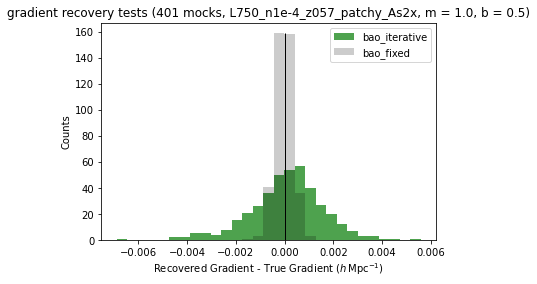

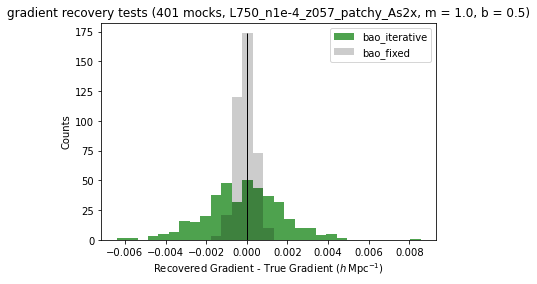

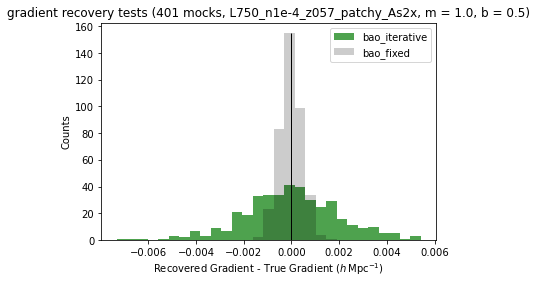

In [7]:
dim = {
        0 : "x",
        1 : "y",
        2 : "z"
        }

nbins = 30

for i in dim:
    fig, ax = plt.subplots()
    ax.set_xlabel("Recovered Gradient - True Gradient ($h\,$Mpc$^{-1}$)")
    ax.set_ylabel("Counts")
    ax.set_title(f"gradient recovery tests ({nmocks} mocks, {cat_tag}, m = 1.0, b = 0.5)")

    it_vals = grads_rec_it[:,i]-grad_exp[i]
    fix_vals = grads_rec_fix[:,i]-grad_exp[i]
    
    print("bao_iterative std: ", np.std(it_vals))
    print("bao_fixed std: ", np.std(fix_vals))

    bins = np.linspace(min(min(it_vals), min(fix_vals)), max(max(it_vals), max(fix_vals)), nbins)
    n_it, _, _ = plt.hist(it_vals, bins=bins, color="forestgreen", alpha=0.8, label="bao_iterative")
    n_fix, _, _ = plt.hist(fix_vals, bins=bins, color="black", alpha=0.2, label="bao_fixed", zorder=100)

    plt.vlines(0, 0, max(max(n_it), max(n_fix)), color="black", alpha=1, zorder=101, linewidth=1)
    #plt.axvline(1/3000)

    plt.legend()

### check bao_iterative results

In [8]:
nmocks1 = 6

grad_bases = np.empty((nmocks1, 2000))
for i in range(nmocks1):
    grad_basis = np.loadtxt(os.path.join(data_dir, f'bases/bao_iterative/tables/final_bases/basis_gradient_{cat_tag}_trrnum_3x_rlz{i}.dat'))
    rcont_grad = grad_basis[:,0]
    grad_bases[i] = grad_basis[:,1]

ln_bases = np.empty((nmocks1, 2000))
for i in range(nmocks1):
    ln_basis = np.loadtxt(os.path.join(data_dir, f'bases/bao_iterative/tables/final_bases/basis_lognormal_{cat_tag}_trrnum_3x_rlz{i}.dat'))
    rcont_ln = ln_basis[:,0]
    ln_bases[i] = ln_basis[:,1]
    
fix_basis = np.loadtxt(os.path.join(data_dir, f'bases/bao_fixed/cosmo_basis.dat'))

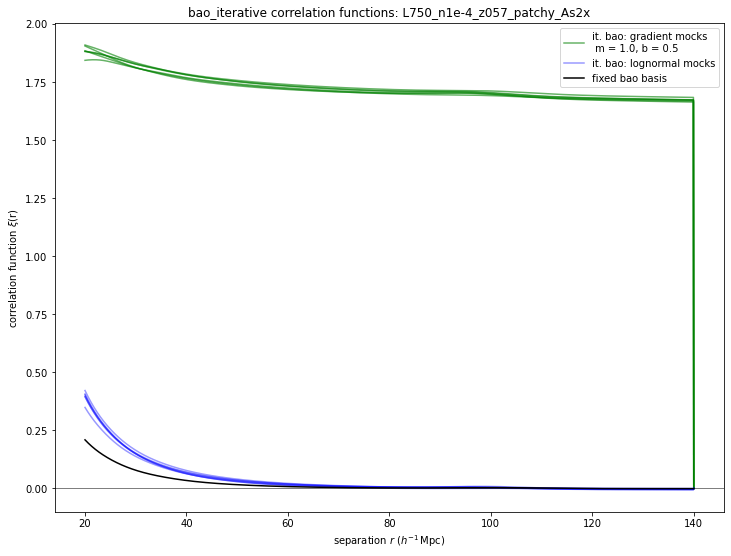

In [9]:
fig, ax = plt.subplots(figsize=(12,9))

for i in range(nmocks1):
    label = f'it. bao: gradient mocks \n m = 1.0, b = 0.5' if i==0 else ''
    plt.plot(rcont_grad, grad_bases[i], 'g', alpha=0.6, label=label)
for i in range(nmocks1):
    label = 'it. bao: lognormal mocks' if i==0 else ''
    plt.plot(rcont_ln, ln_bases[i], 'b', alpha=0.4, label=label)
plt.plot(fix_basis[:,0], fix_basis[:,1], 'k-', label='fixed bao basis')

# ax.set_xlim(40, 140)
# ax.set_ylim(-.05, 0.2)
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_title(f'bao_iterative correlation functions: {cat_tag}')
plt.legend()

### check iterations of an individual mock

In [10]:
bases_dir = os.path.join(data_dir, 'bases/bao_iterative')

In [11]:
def load_cf(rlz, niter, lognormal=False, ana=False):
    mock_tag = 'lognormal' if lognormal else 'gradient'
    grad_tag = '' if lognormal else '_m-1.000-L_b-0.500'
    trr_tag = 'ana' if ana else 'num'
    rand_tag = '' if ana else '_3x'
    cf = np.load(os.path.join(bases_dir, f'results/results_{mock_tag}_L750_n1e-4_z057_patchy_As2x/cf_baoiter_cosmoplanck15_test_trr{trr_tag}{rand_tag}_niter{niter}_L750_n1e-4_z057_patchy_As2x{grad_tag}_rlz{rlz}.npy'), allow_pickle=True)
    return cf

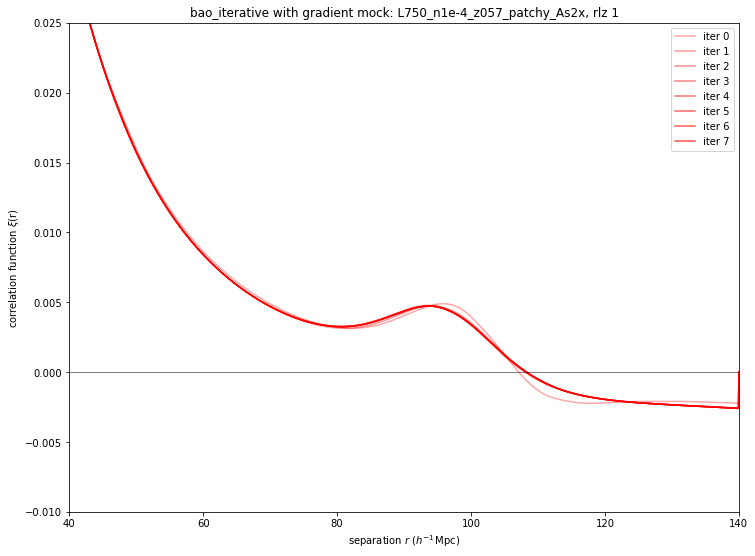

In [12]:
fig, ax = plt.subplots(figsize=(12,9))

rlz = 1
alpha = 0.3

for i in range(8):
    cf = load_cf(rlz, i)
    alpha += 0.05
    plt.plot(cf[0], cf[1], c='r', alpha=alpha, label=f"iter {i}")

ax.set_xlim(40, 140)
ax.set_ylim(-0.01, 0.025)
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_title(f'bao_iterative with gradient mock: L750_n1e-4_z057_patchy_As2x, rlz {rlz}')
plt.legend()

In [13]:
# basis writing timeline: gradient rlz 0
# in {bases_dir}/tables/:
# bases_L750_n1e-4_z057_patchy_As2x_m-1.000-L_b-0.500_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0.dat
# bases_L750_n1e-4_z057_patchy_As2x_m-1.000-L_b-0.500_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0_rlz0.dat
    # this file keeps being written over with each iteration
# separately, the specific iteration is saved in {bases_dir}/results/ as
    # results_gradient_L750_n1e-4_z057_patchy_As2x/cf_baoiter_cosmoplanck15_test_trrnum_3x_niter{niter}_L750_n1e-4_z057_patchy_As2x_m-1.000-L_b-0.500_rlz0.npy
    

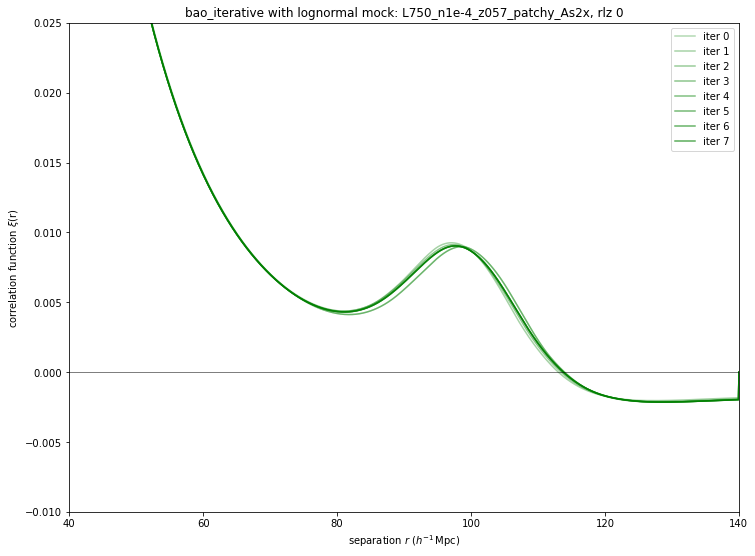

In [14]:
fig, ax = plt.subplots(figsize=(12,9))

rlz = 0
alpha=0.3
for i in range(8):
    cf = load_cf(rlz, i, lognormal=True)
    plt.plot(cf[0], cf[1], color='g', alpha=alpha, label=f'iter {i}')
    alpha += 0.05

plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlim(40, 140)
ax.set_ylim(-0.01, 0.025)
ax.set_title(f'bao_iterative with lognormal mock: L750_n1e-4_z057_patchy_As2x, rlz {rlz}')
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
plt.legend()

### check bases

In [15]:
basis_grad = np.loadtxt(os.path.join(bases_dir, 'tables/bases_L750_n1e-4_z057_patchy_As2x_m-1.000-L_b-0.500_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0.dat'))
basis_ln = np.loadtxt(os.path.join(bases_dir, 'tables/bases_L750_n1e-4_z057_patchy_As2x_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0.dat'))

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


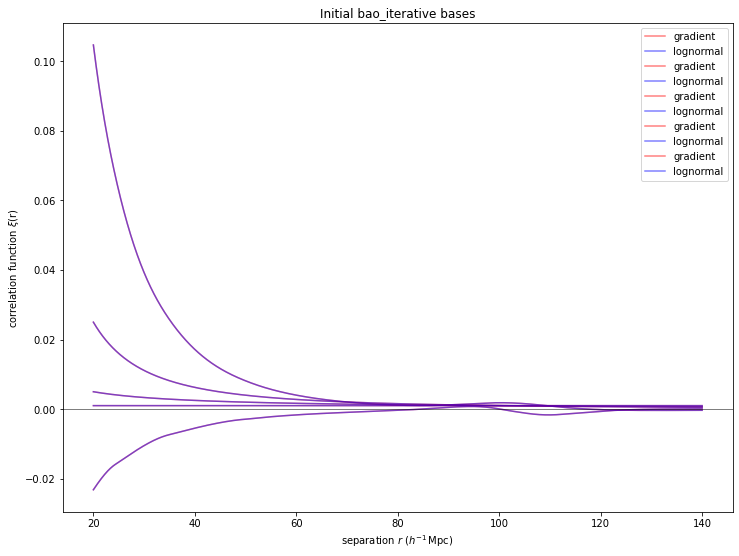

In [16]:
fig, ax = plt.subplots(figsize=(12,9))

for i in range(5):
    plt.plot(basis_grad[:,0], basis_grad[:,i+1], color='r', alpha=0.5, label='gradient')
    plt.plot(basis_ln[:,0], basis_ln[:,i+1], color='b', alpha=0.5, label='lognormal')

plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_title('Initial bao_iterative bases')
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
plt.legend()

print(basis_grad- basis_ln)

In [17]:
# check evolution of bases for a single realization

diff. between final and initial bases:
gradient: [-1.41713796e-02 -1.40876066e-02 -1.40042930e-02 ...  4.41889550e-05
  4.41514524e-05  4.41131413e-05]
lognormal: [-6.31095904e-03 -6.27445882e-03 -6.23811998e-03 ...  1.96849952e-05
  1.96790081e-05  1.96724700e-05]


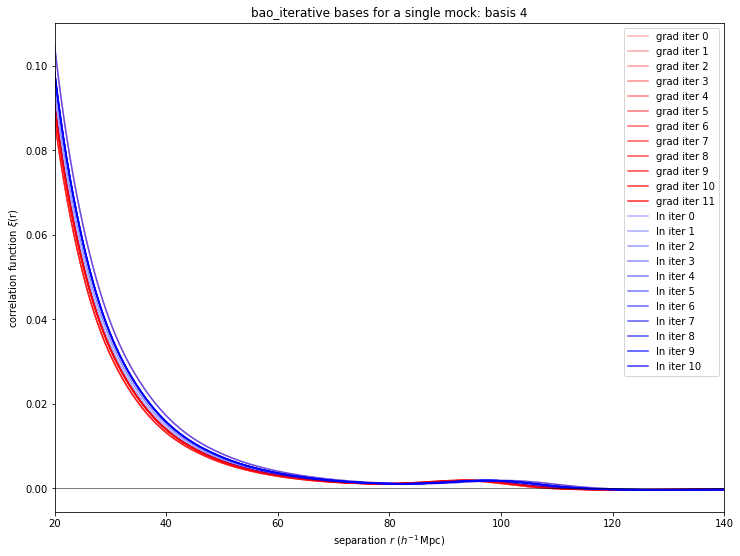

In [18]:
fig, ax = plt.subplots(figsize=(12,9))

base = 4

# gradient

niters_gr = 12
bases_gr_arr = np.empty((2000, 6, niters_gr))
alpha_gr = 0.3

for i in range(niters_gr):
    bases_gr_fn = os.path.join(bases_dir, f'tables/iterated_bases/bases_gradient_L750_n1e-4_z057_patchy_As2x_m-1.000-L_b-0.500_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0_rlz0_niter{i}.dat')
    bases_gr = np.loadtxt(bases_gr_fn)
    bases_gr_arr[:,:,i] = bases_gr
    plt.plot(bases_gr[:,0], bases_gr[:,base], color='r', alpha=alpha_gr, label=f'grad iter {i}')
    alpha_gr += 0.05

# lognormal

niters_ln = 11
bases_ln_arr = np.empty((2000, 6, niters_ln))
alpha_ln = 0.3

for i in range(niters_ln):
    bases_ln_fn = os.path.join(bases_dir, f'tables/iterated_bases/bases_lognormal_L750_n1e-4_z057_patchy_As2x_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0_rlz0_niter{i}.dat')
    bases_ln = np.loadtxt(bases_ln_fn)
    bases_ln_arr[:,:,i] = bases_ln
    plt.plot(bases_ln[:,0], bases_ln[:,base], color='b', alpha=alpha_ln, label=f'ln iter {i}')
    alpha_ln += 0.05

# converged basis function
    
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlim(20, 140)
# ax.set_ylim(-.001, 0.01)
ax.set_title(f'bao_iterative bases for a single mock: basis {base}')
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
plt.legend()

print('diff. between final and initial bases:')
print('gradient:', bases_gr_arr[:, base, 9]-bases_gr_arr[:, base, 0])
print('lognormal:', bases_ln_arr[:, base, 9]-bases_ln_arr[:, base, 0])



In [30]:
# true correlation function
r_t, cf_true = np.loadtxt(f"/scratch/ksf293/mocks/lognormal/inputs/cat_L750_n1e-4_z057_patchy_As2x_Rh_xi.txt", unpack=True)
bias = 2.0
xi_true = bias**2*cf_true
xi_true_grad = 0.5*xi_true

amps:        basis value:    
-3.516434246631306 x 0.025 = -0.08791085616578265
3.291372778823685 x 0.005 = 0.016456863894118427
-0.5222683019749949 x 0.001 = -0.0005222683019749949
3.320705324480934 x 0.08726297973945477 = 0.2897746414508793
9.499106014384037e-05 x -0.01818810527003667 = -1.7277074016085534e-06

-5.955598229154915 x 0.025 = -0.14888995572887287
10.062352146538036 x 0.005 = 0.050311760732690176
-4.472751939546476 x 0.001 = -0.004472751939546476
5.14126273905916 x 0.09839096442078507 = 0.5058537992366778
7.249956473853157e-05 x -0.0213679633347022 = -1.5491680411148112e-06


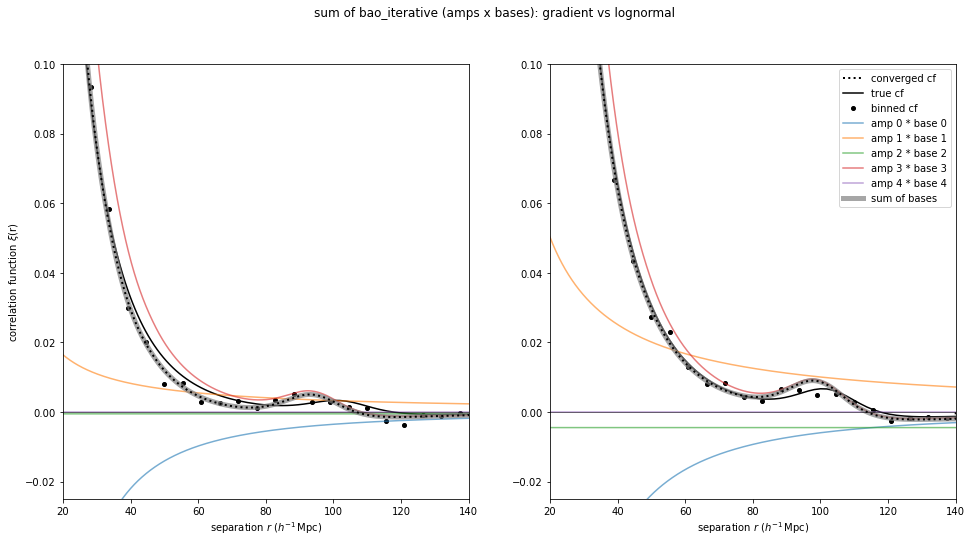

In [33]:
# check whether converged cf matches combination of bases and amps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

# gradient
conv_cf_gr = np.load(os.path.join(bases_dir, 'results/results_gradient_L750_n1e-4_z057_patchy_As2x/converged/cf_baoiter_cosmoplanck15_test_trrnum_3x_L750_n1e-4_z057_patchy_As2x_m-1.000-L_b-0.500_rlz0.npy'), allow_pickle=True)
final_bases_gr = np.loadtxt(os.path.join(bases_dir, 'tables/bases_gradient_L750_n1e-4_z057_patchy_As2x_m-1.000-L_b-0.500_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0_rlz0.dat'))
xi_ls_gr = np.load(os.path.join(grad_dir, f'ls/L750_n1e-4_z057_patchy_As2x/xi_ls_3x_cat_L750_n1e-4_z057_patchy_As2x_lognormal_rlz0_m-1.000-L_b-0.500.npy'), allow_pickle=True)

ax1.plot(conv_cf_gr[0], conv_cf_gr[1], label="converged cf", c='k', ls=':', lw=2, zorder=100)
ax1.plot(xi_ls_gr[0], xi_ls_gr[1], label="binned grad cf", c='k', marker='.', ls='None', lw=2, ms=8)
ax1.plot(r_t, xi_true_grad, label="true cf grad", c='k')

amps_gr = conv_cf_gr[2]
basesxamps_gr = np.empty((len(final_bases_gr[:,0]), len(amps_gr)))
print('amps:        basis value:    ')
for i in range(len(amps_gr)):
    base = amps_gr[i] * final_bases_gr[:,i+1]
    print(f'{amps_gr[i]} x {final_bases_gr[0,i+1]} = {base[0]}')
    ax1.plot(final_bases_gr[:,0], base, label=f"amp {i} * base {i}", alpha=.6)
    basesxamps_gr[:,i] = base
bases_sum_gr = np.sum(basesxamps_gr, axis=1)
ax1.plot(final_bases_gr[:,0], bases_sum_gr, c='gray', alpha=.7, ls='-', lw=5, label="sum of bases")


print('')

# lognormal
conv_cf_ln = np.load(os.path.join(bases_dir, 'results/results_lognormal_L750_n1e-4_z057_patchy_As2x/converged/cf_baoiter_cosmoplanck15_test_trrnum_3x_L750_n1e-4_z057_patchy_As2x_rlz0.npy'), allow_pickle=True)
final_bases_ln = np.loadtxt(os.path.join(bases_dir, 'tables/bases_lognormal_L750_n1e-4_z057_patchy_As2x_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0_rlz0.dat'))
xi_ls_ln = np.load(os.path.join(data_dir, f'lognormal/xi/ls/L750_n1e-4_z057_patchy_As2x/xi_cat_L750_n1e-4_z057_patchy_As2x_lognormal_rlz0.npy'), allow_pickle=True)

ax2.plot(conv_cf_ln[0], conv_cf_ln[1], label="converged cf", c='k', ls=':', lw=2, zorder=100)
ax2.plot(r_t, xi_true, label="true cf", c='k') # true cf
ax2.plot(xi_ls_ln[0], xi_ls_ln[1], label="binned cf", c='k', marker='.', ls='None', lw=2, ms=8)

amps_ln = conv_cf_ln[2]
basesxamps_ln = np.empty((len(final_bases_ln[:,0]), len(amps_ln)))
for i in range(len(amps_ln)):
    base = amps_ln[i] * final_bases_ln[:,i+1]
    print(f'{amps_ln[i]} x {final_bases_ln[0,i+1]} = {base[0]}')
    ax2.plot(final_bases_ln[:,0], base, label=f"amp {i} * base {i}", alpha=.6)
    basesxamps_ln[:,i] = base
bases_sum_ln = np.sum(basesxamps_ln, axis=1)
ax2.plot(final_bases_ln[:,0], bases_sum_ln, c='gray', alpha=.7, ls='-', lw=5, label="sum of bases")

for ax in [ax1, ax2]:
    ax.set_xlim(20, 140)
    ax.set_ylim(-.025, 0.1)
    ax.axhline(0, color="k", alpha=0.5, lw=1)
    ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax1.set_ylabel(r'correlation function $\xi$(r)')
fig.suptitle('sum of bao_iterative (amps x bases): gradient vs lognormal')
plt.legend()

In [21]:
# individual bases look fine.. so maybe the problem is with the gradient amplitudes?

In [22]:
print('gradient amps:', amps_gr)
print('lognormal amps:', amps_ln)

gradient amps: [-3.51643425e+00  3.29137278e+00 -5.22268302e-01  3.32070532e+00
  9.49910601e-05]
lognormal amps: [-5.95559823e+00  1.00623521e+01 -4.47275194e+00  5.14126274e+00
  7.24995647e-05]


### check m = 0 gradient mocks

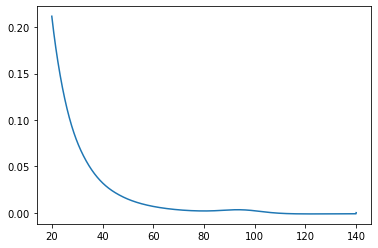

In [23]:
m0 = np.load(os.path.join(bases_dir, 'results/results_gradient_L750_n1e-4_z057_patchy_As2x/converged/cf_baoiter_cosmoplanck15_test_trrnum_3x_L750_n1e-4_z057_patchy_As2x_m-0.000-L_b-0.500_rlz0.npy'), allow_pickle=True)
plt.plot(m0[0], m0[1])

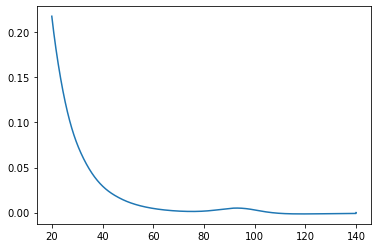

In [24]:
m1 = np.load(os.path.join(bases_dir, 'results/results_gradient_L750_n1e-4_z057_patchy_As2x/converged/cf_baoiter_cosmoplanck15_test_trrnum_3x_L750_n1e-4_z057_patchy_As2x_m-1.000-L_b-0.500_rlz0.npy'), allow_pickle=True)
plt.plot(m1[0], m1[1])